# Введение в Машинное обучение

## Высшая Школа Цифровой Культуры

## Материалы к лекции 4. Линейная регрессия

### Задание 2

In [1]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')

In [2]:
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [3]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['One dime', 'Nik L Nip'])

In [4]:
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [5]:
DATA.loc['One dime'].drop(['winpercent', 'Y'])

chocolate           0.000
fruity              0.000
caramel             0.000
peanutyalmondy      0.000
nougat              0.000
crispedricewafer    0.000
hard                0.000
bar                 0.000
pluribus            0.000
sugarpercent        0.011
pricepercent        0.116
Name: One dime, dtype: float64

In [6]:
#отбираем данные для предикторов, удаляя два последних столбца, индекс не включается в данные.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [7]:
#указываем столбец отклика
y = pd.DataFrame(train_data['winpercent'])

In [8]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [9]:
#обучение модели
reg = LinearRegression().fit(X, y)

In [10]:
#предсказание для конфет One dime  and  ' Nik L Nip:' и с параметрами [0, 1, 0, 1, 1, 0, 1, 1, 1, 0.848, 0.594] 
pred_dime = reg.predict([DATA.loc['One dime'].drop(['winpercent', 'Y'])])
pred_nik = reg.predict([DATA.loc['Nik L Nip'].drop(['winpercent', 'Y'])])
pred_three = reg.predict([[0, 1, 0, 1, 1, 0, 1, 1, 1, 0.848, 0.594]])
print(f'One Dime: {pred_dime}')
print(f'Nik L Nip: {pred_nik}')
print(f'with params: {pred_three}')

One Dime: [[35.81785213]]
Nik L Nip: [[40.5568858]]
with params: [[46.24325994]]


In [11]:
#предсказание для конфет из таблицы

#выбираем строку из таблицы
AirHeads = DATA.loc['Air Heads',:].to_frame().T

#отбираем данные для предикторов и выполняем предсказание с помощью модели
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[53.34269142]])

Значение коэффициента $\theta_0$:

In [12]:
reg.intercept_

array([36.33367039])

Значение коэффициентов $\theta_1, \ldots, \theta_p$:

In [13]:
reg.coef_

array([[24.76370574, 11.17679755, -1.9712377 ,  7.66205829,  4.62158744,
        10.62417316, -8.17018918, -6.62056183, -3.60071653,  9.45082706,
        -5.34290828]])

## Задача 1

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

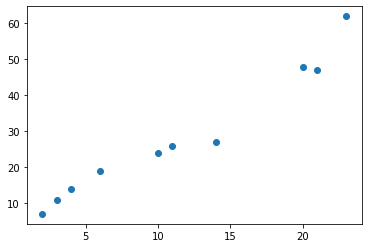

In [15]:
data1 = pd.read_csv('data1.csv', index_col = 'id')
plt.plot(data1.X, data1.Y, 'o')
plt.show()

In [16]:
X_m = data1.X.mean()
Y_m = data1.Y.mean()
n = data1.shape[0]
theta_1 = 0
znamenatel = 0
for x, y in zip(data1.X, data1.Y):
    theta_1 += (x-X_m)*(y-Y_m)
    znamenatel += (x-X_m)**2
theta_1 /= znamenatel
theta_2 = Y_m - theta_1 * X_m

r2 = 0
znamenatel = 0
for x, y in zip(data1.X, data1.Y):
    r2 += (y -theta_2-theta_1*x)**2
    znamenatel += (y-Y_m)**2
r2 = 1 - r2/znamenatel



print(X_m, Y_m, theta_1, theta_2, r2)

11.4 28.5 2.2538015930485154 2.8066618392469245 0.953605092046016
